#**Use 30 ETFs (all are mostly traded).**#

#Data and background
Step 1: Prepare raw data

In [1]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import cvxpy as cp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# List of ETF tickers
etfs = [
    'SPY', 'QQQ', 'VTI', 'IVV', 'GLD', 'EEM', 'IWM', 'TLT', 'VOO', 'XLF',
    'HYG', 'BND', 'VEA', 'AGG', 'VWO', 'LQD', 'USO', 'SHY', 'SDS', 'IEF',
    'UUP', 'SLV', 'EWZ', 'TIP', 'FXI', 'XLV', 'XLE', 'XLI', 'DIA', 'XLK'
]

# List to store DataFrames for each ETF
etf_dataframes = []

# Download adjusted close price data for each ETF and store in DataFrame
for etf in etfs:
    print(f"Downloading data for {etf}...")
    etf_data = yf.download(etf, start='2015-01-01')

    # Select only the "Adj Close" column and rename it with the ETF ticker
    etf_data = etf_data[['Adj Close']].rename(columns={'Adj Close': etf})

    # Append DataFrame to list
    etf_dataframes.append(etf_data)

# Concatenate DataFrames into a single DataFrame
etf_prices = pd.concat(etf_dataframes, axis=1)


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


Step 2: Filter Data

In [2]:
# ETF data
# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = etf_prices.loc[start_date:end_date] #2021-01-04 to 2024-01-31 #774 rows

# Calculate returns
returns = filtered_data.pct_change().dropna()   #773 rows

#Plot the Historical Data

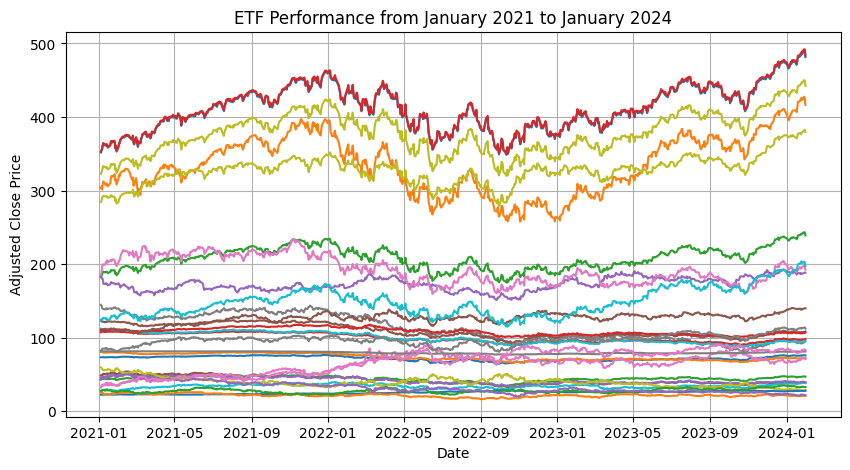

In [4]:
import matplotlib.pyplot as plt

# Assuming 'filtered_data' contains the adjusted close prices for the 30 ETFs
# Plot each ETF
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
for column in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[column], label=column)

plt.title('ETF Performance from January 2021 to January 2024')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of the plot
plt.grid(True)
plt.show()

#**Sample Covariance Method with optimized weights**

#Utilizing different C values as constraints#
**Base Case: C = 1**


Step 1: Calculate the Covariance Matrix using data of past three years 2021-01-05 to 2024-01-31

In [5]:
# Compute covariance matrix
cov_matrix = returns.cov()
filtered_data

,SPY,QQQ,VTI,IVV,GLD,EEM,IWM,TLT,VOO,XLF,...,UUP,SLV,EWZ,TIP,FXI,XLV,XLE,XLI,DIA,XLK
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,351.674469,303.077484,182.779861,352.802277,182.330002,48.520832,185.704163,144.575180,322.615875,27.365189,...,22.604940,25.350000,28.058058,111.003326,43.141300,107.409691,33.281273,82.101082,284.403473,124.412346
2021-01-05,354.096558,305.576080,184.256424,355.136963,182.869995,49.687206,188.573669,143.501495,324.737885,27.487522,...,22.474493,25.670000,28.219179,110.968590,44.315338,108.189484,34.771748,82.908707,285.833435,125.219727
2021-01-06,356.213501,301.343140,185.914001,357.281189,179.899994,49.267307,196.289749,140.555649,326.707672,28.701454,...,22.446539,25.340000,28.104092,110.638496,43.802864,109.672966,35.832607,84.884979,289.944366,123.060272
2021-01-07,361.506012,308.633209,188.895691,362.570068,179.479996,49.733856,199.783127,139.316742,331.589325,29.115507,...,22.576986,25.260000,28.510733,110.569016,44.110352,111.099380,36.358662,85.350563,292.098694,126.377296
2021-01-08,363.565826,312.601624,189.810226,364.638000,173.339996,51.049519,199.351242,138.867081,333.454407,29.096685,...,22.614258,23.510000,28.925039,110.134674,45.023491,111.631920,36.314816,85.141541,292.606689,127.194359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,486.518372,425.786987,241.471420,488.773956,187.139999,38.860001,195.473648,92.732536,447.062317,38.365551,...,27.780001,20.940001,33.189999,106.064240,22.750000,137.981750,82.959572,113.259972,378.773041,203.763519
2024-01-26,485.900299,423.250336,241.272110,488.265594,187.009995,38.889999,195.483627,92.554893,446.793182,38.505028,...,27.780001,20.860001,33.369999,105.964958,22.600000,138.768921,83.574600,113.080528,379.380280,201.417389
2024-01-29,489.748322,427.584595,243.464417,492.103394,188.330002,38.910000,198.904938,93.620789,450.042725,38.604652,...,27.780001,21.209999,33.130001,106.431580,22.290001,139.745377,83.455559,113.818245,381.590332,203.264343


Step 2: Retrieve the recent three month realized etf returns

In [6]:
#As if we hold the portfolio for 3 months Feb Mar Apr
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 4, 30)

# Calculate returns for February to April 2024
specific_months_returns = etf_prices.loc[start_date:end_date].pct_change().dropna() # 61rows and 30 columns


Step 3: Set up the Markowitz Portfolio Optimization Problem

In [7]:
# Assuming 'returns' is a pandas DataFrame of asset returns
num_assets = 30
expected_returns = returns.mean().values

# Optimization variables
weights = cp.Variable(num_assets)

# Portfolio return
portfolio_return = weights.T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights is 1
    weights >= 0,          # Weights are non-negative
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
optimized_weights = weights.value
optimized_return = portfolio_return.value
optimized_variance = portfolio_variance.value

print("Optimized Weights:", optimized_weights)

Optimized Weights: [5.70926998e-08 7.51125889e-08 4.30426404e-08 5.74630515e-08
 3.75906800e-08 1.46556386e-08 1.86557078e-08 1.76270016e-08
 5.80531017e-08 5.43546743e-08 3.14133360e-08 2.81100969e-08
 2.62621768e-08 2.81339451e-08 1.73946392e-08 2.53988953e-08
 8.69700614e-02 3.79791258e-08 3.91091161e-08 2.56440863e-08
 3.07784646e-01 1.80475865e-08 3.17985841e-08 3.11483926e-08
 9.67186346e-09 9.94661262e-08 4.28251908e-01 5.24764022e-08
 5.38941799e-08 1.76992396e-01]


Updating C = 1 to other numbers ranging to infinity

In [8]:
import numpy as np
import cvxpy as cp

# Assuming 'returns' and 'cov_matrix' are predefined Pandas DataFrame and NumPy array, respectively.
num_assets = 30
expected_returns = returns.mean().values
risk_tolerance = 0.0001  # Fixed risk tolerance

# Define a range of 'c' values you want to test
c_values = [1.0, 1.5, 2.0, 2.5, 3.0, 10.0, 100000.0]

results = []

for c in c_values:
    # Optimization variables
    weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
    weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

    # Portfolio return
    portfolio_return = cp.matmul(weights_pos - weights_neg, expected_returns)

    # Portfolio variance
    portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

    # Constraints
    constraints = [
        cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights equals 1
        cp.sum(weights_pos) + cp.sum(weights_neg) == c,  # Sum of absolute values of weights equals c
        portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
    ]

    # Objective function to maximize expected return
    objective = cp.Maximize(portfolio_return)

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Optimized weights
    optimized_weights = (weights_pos - weights_neg).value

    # Calculate portfolio statistics if the problem is solved successfully
    if problem.status not in ["infeasible", "unbounded"]:
        growth_rate = 1+specific_months_returns
        daily_returns = growth_rate.dot(optimized_weights)
        quarter_return = np.prod(daily_returns)
        daily_sd = np.std(daily_returns, ddof=1)

        # Annualize the returns and standard deviation
        annualized_return = quarter_return ** 4 - 1
        annualized_sd = daily_sd * np.sqrt(252)

        # Calculate the Sharpe Ratio
        risk_free_rate = 0.05  # Assume a risk-free rate of 5%
        sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

        results.append({
            'c_value': c,
            'annualized_return': annualized_return,
            'annualized_sd': annualized_sd,
            'sharpe_ratio': sharpe_ratio,
            'max_weight': np.max(optimized_weights),
            'num_positive': np.sum(optimized_weights > 0),
            'num_negative': np.sum(optimized_weights < 0)
        })

# Print all results
for result in results:
    print(f"C Value: {result['c_value']}")
    print(f"Annualized Return: {result['annualized_return']}")
    print(f"Annualized SD: {result['annualized_sd']}")
    print(f"Sharpe Ratio: {result['sharpe_ratio']}")
    print(f"Max Weight: {result['max_weight']}")
    print(f"Number of Positive Weights: {result['num_positive']}")
    print(f"Number of Negative Weights: {result['num_negative']}\n")


C Value: 1.0
Annualized Return: 0.35485894432262133
Annualized SD: 0.08007972311308528
Sharpe Ratio: 3.806943037154513
Max Weight: 0.42823212807107053
Number of Positive Weights: 30
Number of Negative Weights: 0

C Value: 1.5
Annualized Return: 0.15549198947726572
Annualized SD: 0.0963071119602684
Sharpe Ratio: 1.0953707086636193
Max Weight: 0.46442919028598245
Number of Positive Weights: 17
Number of Negative Weights: 13

C Value: 2.0
Annualized Return: 0.2099794354749014
Annualized SD: 0.11212422229413667
Sharpe Ratio: 1.4268053075563427
Max Weight: 0.5911289559955135
Number of Positive Weights: 17
Number of Negative Weights: 13

C Value: 2.5
Annualized Return: 0.2543319628718952
Annualized SD: 0.1271709502336669
Sharpe Ratio: 1.6067503034022381
Max Weight: 0.7008031932784772
Number of Positive Weights: 18
Number of Negative Weights: 12

C Value: 3.0
Annualized Return: 0.2975921436196134
Annualized SD: 0.13125189578316684
Sharpe Ratio: 1.886389085218587
Max Weight: 0.725888138436308


**C = Infinity**

In [ ]:
# Optimization variables
weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

# Portfolio return
portfolio_return = (weights_pos - weights_neg).T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
    #cp.sum(weights_pos) + cp.sum(weights_neg) == 30,  # Sum of absolute values of weights is 2
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
optimized_weights = (weights_pos - weights_neg).value

# Given data
#growth_rate = 1+specific_months_returns
daily_returns = growth_rate.dot(optimized_weights)
quarter_return = np.prod(daily_returns) # this compares to
daily_sd = np.std(daily_returns, ddof=1)

# Annualize the returns and standard deviation
annualized_return = quarter_return ** 4 -1
annualized_sd = daily_sd * np.sqrt(252)

# Assume a risk-free rate of 5%
risk_free_rate = 0.05

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

print("Annualized Return:", annualized_return)
print("Annualized Standard Deviation:", annualized_sd)
print("Sharpe Ratio:", sharpe_ratio)
print("Max weight is", np.max(optimized_weights))
weight_diff = (weights_pos - weights_neg).value
num_positive = np.sum(weight_diff > 0)
num_negative = np.sum(weight_diff < 0)

print("Number of positive elements:", num_positive)
print("Number of negative elements:", num_negative)


Annualized Return: 0.38208005884224416
Annualized Standard Deviation: 0.14499673887506714
Sharpe Ratio: 2.290258811464531
Max weight is 2.7151739467709746
Number of positive elements: 19
Number of negative elements: 11


#**Sample Covariance Method with equal weights**

In [9]:
num_elements = 30

# Generate the list with equal weights
equal_weights = [1/num_elements for _ in range(num_elements)]
print(equal_weights)

[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]


Updating C = 1 to other numbers ranging to infinity

In [10]:
import numpy as np
import cvxpy as cp

# Assuming 'returns' and 'cov_matrix' are predefined Pandas DataFrame and NumPy array, respectively.
num_assets = 30
expected_returns = returns.mean().values
risk_tolerance = 0.0001  # Fixed risk tolerance

# Define a range of 'c' values you want to test
c_values = [1.0, 1.5, 2.0, 2.5, 3.0, 10.0, 100000.0]

results = []

for c in c_values:
    # Optimization variables
    weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
    weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

    # Portfolio return
    portfolio_return = cp.matmul(weights_pos - weights_neg, expected_returns)

    # Portfolio variance
    portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

    # Constraints
    constraints = [
        cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights equals 1
        cp.sum(weights_pos) + cp.sum(weights_neg) == c,  # Sum of absolute values of weights equals c
        portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
    ]

    # Objective function to maximize expected return
    objective = cp.Maximize(portfolio_return)

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # After solving, set all weights to equal weights
    equal_weights = np.full(num_assets, 1/num_assets)

    # Calculate portfolio statistics using equal weights
    growth_rate = 1 + specific_months_returns  # Ensure 'specific_months_returns' is defined
    daily_returns = growth_rate.dot(equal_weights)  # Using equal weights
    quarter_return = np.prod(daily_returns)
    daily_sd = np.std(daily_returns, ddof=1)

    # Annualize the returns and standard deviation
    annualized_return = quarter_return ** 4 - 1
    annualized_sd = daily_sd * np.sqrt(252)

    # Calculate the Sharpe Ratio
    risk_free_rate = 0.05  # Assume a risk-free rate of 5%
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

    results.append({
        'c_value': c,
        'annualized_return': annualized_return,
        'annualized_sd': annualized_sd,
        'sharpe_ratio': sharpe_ratio,
        'max_weight': np.max(equal_weights),
        'num_positive': np.sum(equal_weights > 0),
        'num_negative': np.sum(equal_weights < 0)
    })

# Print all results
for result in results:
    print(f"C Value: {result['c_value']}")
    print(f"Annualized Return: {result['annualized_return']}")
    print(f"Annualized SD: {result['annualized_sd']}")
    print(f"Sharpe Ratio: {result['sharpe_ratio']}")
    print(f"Max Weight: {result['max_weight']}")
    print(f"Number of Positive Weights: {result['num_positive']}")
    print(f"Number of Negative Weights: {result['num_negative']}\n")


C Value: 1.0
Annualized Return: 0.0896343971383895
Annualized SD: 0.06957976139344836
Sharpe Ratio: 0.5696253672712577
Max Weight: 0.03333333333333333
Number of Positive Weights: 30
Number of Negative Weights: 0

C Value: 1.5
Annualized Return: 0.0896343971383895
Annualized SD: 0.06957976139344836
Sharpe Ratio: 0.5696253672712577
Max Weight: 0.03333333333333333
Number of Positive Weights: 30
Number of Negative Weights: 0

C Value: 2.0
Annualized Return: 0.0896343971383895
Annualized SD: 0.06957976139344836
Sharpe Ratio: 0.5696253672712577
Max Weight: 0.03333333333333333
Number of Positive Weights: 30
Number of Negative Weights: 0

C Value: 2.5
Annualized Return: 0.0896343971383895
Annualized SD: 0.06957976139344836
Sharpe Ratio: 0.5696253672712577
Max Weight: 0.03333333333333333
Number of Positive Weights: 30
Number of Negative Weights: 0

C Value: 3.0
Annualized Return: 0.0896343971383895
Annualized SD: 0.06957976139344836
Sharpe Ratio: 0.5696253672712577
Max Weight: 0.033333333333333

**C = Infinity**

In [11]:
# Portfolio return
portfolio_return = (weights_pos - weights_neg).T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
    #cp.sum(weights_pos) + cp.sum(weights_neg) == 30,  # Sum of absolute values of weights is 2
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
equal_weights = np.full(num_assets, 1/num_assets)

# Given data
#growth_rate = 1+specific_months_returns
daily_returns = growth_rate.dot(equal_weights)
quarter_return = np.prod(daily_returns) # this compares to
daily_sd = np.std(daily_returns, ddof=1)

# Annualize the returns and standard deviation
annualized_return = quarter_return ** 4 -1
annualized_sd = daily_sd * np.sqrt(252)

# Assume a risk-free rate of 5%
risk_free_rate = 0.05

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

print("Annualized Return:", annualized_return)
print("Annualized Standard Deviation:", annualized_sd)
print("Sharpe Ratio:", sharpe_ratio)
print("Max weight is", np.max(equal_weights))
weight_diff = (weights_pos - weights_neg).value
num_positive = np.sum(weight_diff > 0)
num_negative = np.sum(weight_diff < 0)

print("Number of positive elements:", num_positive)
print("Number of negative elements:", num_negative)


Annualized Return: 0.0896343971383895
Annualized Standard Deviation: 0.06957976139344836
Sharpe Ratio: 0.5696253672712577
Max weight is 0.03333333333333333
Number of positive elements: 19
Number of negative elements: 11


#**Factor Model Method with optimized weights**

In [ ]:
# Update the path according to your folder structure
df = pd.read_csv('/5_Factors.CSV', skiprows=2)
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], format='%Y%m%d')
df.set_index('Unnamed: 0', inplace=True)
# Filter the data to match the date
df = df[(df.index >= pd.Timestamp('2021-01-01')) & (df.index <= pd.Timestamp('2024-01-31'))]
print(df) # 774 rows

            Mkt-RF   SMB   HML   RMW   CMA     RF
Unnamed: 0                                       
2021-01-04   -1.41  0.16  0.58 -0.64  0.10  0.000
2021-01-05    0.86  1.32  0.49  0.36  0.55  0.000
2021-01-06    0.79  3.15  3.94  0.06  0.53  0.000
2021-01-07    1.76  0.02 -0.83 -1.50 -0.20  0.000
2021-01-08    0.51 -1.01 -1.37 -0.43 -0.37  0.000
...            ...   ...   ...   ...   ...    ...
2024-01-25    0.46  0.20  0.56 -0.19  0.55  0.022
2024-01-26   -0.02  0.35 -0.27  0.22 -0.02  0.022
2024-01-29    0.86  0.89 -0.59 -1.13 -0.31  0.022
2024-01-30   -0.13 -0.96  0.84  1.00  0.13  0.022
2024-01-31   -1.74 -0.89 -0.30 -0.21  0.37  0.022

[774 rows x 6 columns]


In [ ]:
# Merge the ETF prices with the factors on date
returns.index = pd.to_datetime(returns.index)
df.index = pd.to_datetime(df.index)
data = pd.concat([returns, df], axis=1).dropna()  # 773 Rows  2021-01-05 - 2024-01-30
data

,SPY,QQQ,VTI,IVV,GLD,EEM,IWM,TLT,VOO,XLF,...,XLE,XLI,DIA,XLK,Mkt-RF,SMB,HML,RMW,CMA,RF
2021-01-05,0.006887,0.008244,0.008078,0.006618,0.002962,0.024038,0.015452,-0.007426,0.006578,0.004470,...,0.044784,0.009837,0.005028,0.006489,0.86,1.32,0.49,0.36,0.55,0.000
2021-01-06,0.005979,-0.013852,0.008996,0.006037,-0.016241,-0.008451,0.040918,-0.020529,0.006066,0.044163,...,0.030509,0.023837,0.014382,-0.017245,0.79,3.15,3.94,0.06,0.53,0.000
2021-01-07,0.014857,0.024192,0.016038,0.014803,-0.002335,0.009470,0.017797,-0.008814,0.014942,0.014426,...,0.014681,0.005485,0.007430,0.026954,1.76,0.02,-0.83,-1.50,-0.20,0.000
2021-01-08,0.005698,0.012858,0.004841,0.005704,-0.034210,0.026454,-0.002162,-0.003228,0.005625,-0.000646,...,-0.001206,-0.002449,0.001739,0.006465,0.51,-1.01,-1.37,-0.43,-0.37,0.000
2021-01-11,-0.006741,-0.014450,-0.005972,-0.006534,-0.001961,-0.013526,-0.000867,-0.001652,-0.006535,0.003234,...,0.015693,-0.000335,-0.002797,-0.008259,-0.51,0.54,1.26,-0.17,0.45,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.005439,0.001221,0.005561,0.005578,0.003970,0.001288,0.008284,0.006535,0.005628,0.004958,...,0.022497,0.009597,0.006321,0.004182,0.46,0.20,0.56,-0.19,0.55,0.022
2024-01-26,-0.001270,-0.005958,-0.000825,-0.001040,-0.000695,0.000772,0.000051,-0.001916,-0.000602,0.003635,...,0.007414,-0.001584,0.001603,-0.011514,-0.02,0.35,-0.27,0.22,-0.02,0.022
2024-01-29,0.007919,0.010240,0.009086,0.007860,0.007058,0.000514,0.017502,0.011516,0.007273,0.002587,...,-0.001424,0.006524,0.005825,0.009170,0.86,0.89,-0.59,-1.13,-0.31,0.022
2024-01-30,-0.000773,-0.006657,-0.001392,-0.000750,0.001381,-0.007967,-0.008525,0.009066,-0.000709,0.012645,...,0.010341,0.000350,0.003078,-0.008251,-0.13,-0.96,0.84,1.00,0.13,0.022


Step 1: Calculate the Factor Model Covariance Matrix using data of past three years 2021-01-05 to 2024-01-31

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.337839  0.200752 -0.439214 -0.295037 -0.338805
SMB     0.200752  0.541250  0.104861 -0.215985 -0.001800
HML    -0.439214  0.104861  1.109992  0.323820  0.494091
RMW    -0.295037 -0.215985  0.323820  0.510852  0.178210
CMA    -0.338805 -0.001800  0.494091  0.178210  0.397571


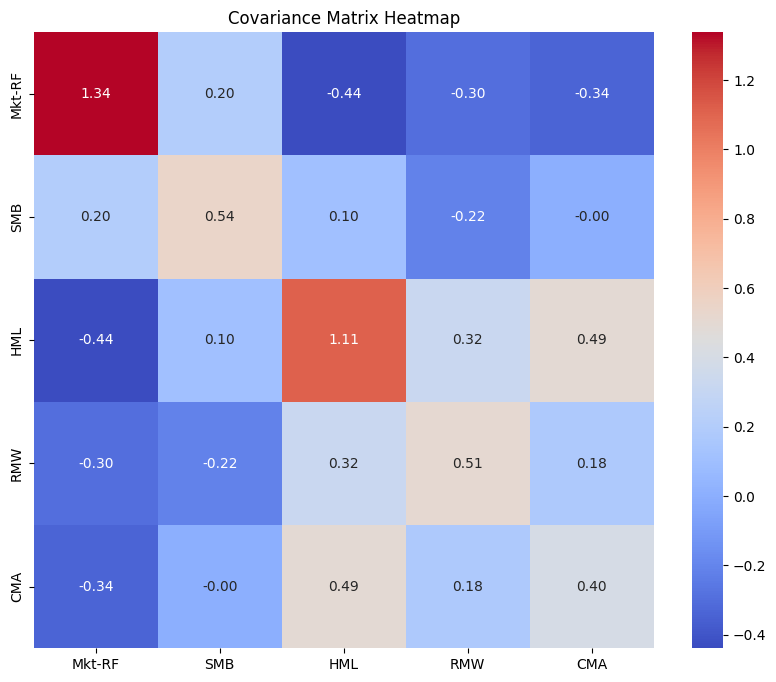

In [ ]:
factors = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Convert these to numeric if not already
factors = factors.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that might have been introduced
factors = factors.dropna()

# Calculate the covariance matrix
factor_covariance_matrix = factors.cov()

# Display the covariance matrix
print(factor_covariance_matrix)

# Assuming 'cov_matrix' is your covariance matrix DataFrame
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(factor_covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Covariance Matrix Heatmap')
plt.show()


Step 2: Run the linear regression

In [ ]:
import statsmodels.api as sm
factor_levels = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].dropna()

# Dictionary to hold regression results
regressions = {}
for etf in etfs:
    y = returns[etf]
    X = factor_levels
    model = sm.OLS(y, X, missing='drop')
    results = model.fit()
    regressions[etf] = {
        'params': results.params,
        'resid': results.resid,
        'predict': results.predict()
    }
# Example: Output beta coefficients for a specific ETF
print(regressions['SPY']['params']) # SPY = 0.009931*(Mkt-Rf) -0.001089*SMB +0.0000197*(HML)+....

import pandas as pd

# Assuming regressions dictionary contains regression results for each ETF
# Extract beta coefficients for each ETF into a DataFrame
betas = pd.DataFrame({etf: values['params'] for etf, values in regressions.items()})

# Optionally, if you're using Jupyter Notebook, simply write 'betas' without print() for a nicer format:
betas


Mkt-RF    0.009931
SMB      -0.001089
HML       0.000197
RMW       0.000821
CMA       0.000340
dtype: float64


,SPY,QQQ,VTI,IVV,GLD,EEM,IWM,TLT,VOO,XLF,...,UUP,SLV,EWZ,TIP,FXI,XLV,XLE,XLI,DIA,XLK
Mkt-RF,0.009931,0.011318,0.009939,0.009931,0.001369,0.006787,0.010308,-0.000221,0.009897,0.010217,...,-0.001744,0.004526,0.007911,0.000837,0.006522,0.006677,0.010337,0.009320,0.008625,0.012116
SMB,-0.001089,-0.001548,-0.000013,-0.001109,0.000020,0.000402,0.008498,0.001386,-0.001077,-0.000857,...,-0.000117,0.000288,-0.000633,0.000018,0.000867,-0.001750,-0.002448,0.001449,-0.000698,-0.001722
HML,0.000197,-0.003213,0.000159,0.000199,-0.000983,0.000382,0.000795,-0.003377,0.000178,0.007764,...,-0.000362,0.000036,0.003989,-0.000732,-0.000294,-0.001228,0.011406,0.002828,0.001648,-0.003735
RMW,0.000821,0.000619,0.000248,0.000799,-0.000858,-0.002711,-0.000856,0.001306,0.000844,-0.001012,...,0.000324,-0.002619,-0.005377,-0.000109,-0.005001,0.000992,-0.008586,0.001711,0.001208,0.001986
CMA,0.000340,-0.000641,0.000133,0.000373,0.003173,0.000141,0.000447,0.001061,0.000337,-0.003850,...,0.000045,0.004725,0.003112,0.001001,-0.001153,0.003556,0.005028,0.000351,0.001240,0.001154


Step 3: Compute the Covariance matrix using
$$\Sigma_{R} = \beta^{T} \Sigma_{F} \beta + \Sigma_{\sigma}$$

In [ ]:
# Calculate the covariance matrix of factor levels
factor_cov_matrix = factor_levels.cov()

# Calculate idiosyncratic variance (variance of residuals)
idiosyncratic_var = {etf: regressions[etf]['resid'].var() for etf in etfs}

# Asset covariance matrix calculation using factor model
# Initialize an empty DataFrame
asset_cov_matrix = pd.DataFrame(index=etfs, columns=etfs)

# Populate the asset covariance matrix
for etf_i in etfs:
    for etf_j in etfs:
        if etf_i == etf_j:
            # Diagonal elements: Variance from factors + idiosyncratic variance
            beta_i = regressions[etf_i]['params']
            asset_cov_matrix.loc[etf_i, etf_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_i)) + idiosyncratic_var[etf_i]
        else:
            # Off-diagonal elements: Covariance from factors only
            beta_i = regressions[etf_i]['params']
            beta_j = regressions[etf_j]['params']
            asset_cov_matrix.loc[etf_i, etf_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_j))

#asset_cov_matrix


#Utilizing different C values as constraints#
**Base Case: C = 1**

In [ ]:
# As if we hold the portfolio for 3 months Feb Mar Apr
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 4, 30)

# Calculate returns for February to April 2024
specific_months_returns = etf_prices.loc[start_date:end_date].pct_change().dropna() # 61rows and 30 columns

Set up the Markowitz Portfolio Optimization Problem and calculate optimized weights

In [ ]:
# Assuming 'returns' is a pandas DataFrame of asset returns
num_assets = 30
expected_returns = returns.mean().values

# Optimization variables
weights = cp.Variable(num_assets)

# Portfolio return
portfolio_return = weights.T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights, asset_cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights is 1
    weights >= 0,          # Weights are non-negative
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
optimized_weights = weights.value
optimized_return = portfolio_return.value
optimized_variance = portfolio_variance.value

print("Optimized Weights:", optimized_weights)

Optimized Weights: [6.33014169e-08 1.12881674e-07 4.49649175e-08 6.39502533e-08
 4.83156414e-08 1.60899571e-08 2.00097401e-08 1.86702732e-08
 6.47482748e-08 4.40188211e-08 3.39974896e-08 3.02658485e-08
 2.62335651e-08 3.02747186e-08 1.88477268e-08 2.67248037e-08
 1.93655358e-01 4.32987768e-08 7.68349685e-08 2.75010317e-08
 2.72488470e-01 2.15425846e-08 4.10136369e-08 3.59984146e-08
 1.13458350e-08 9.75916897e-08 3.83859819e-01 5.32440725e-08
 5.48757609e-08 1.49995226e-01]


Updating C = 1 to other numbers ranging to infinity

In [ ]:
import numpy as np
import cvxpy as cp

# Assuming 'returns' and 'asset_cov_matrix' are predefined Pandas DataFrame and NumPy array, respectively.
num_assets = 30
expected_returns = returns.mean().values
risk_tolerance = 0.0001  # Fixed risk tolerance

# Define a range of 'c' values you want to test
c_values = [1.0, 1.5, 2.0, 2.5, 3.0, 10.0, 100000.0]

results = []

for c in c_values:
    # Optimization variables
    weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
    weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

    # Portfolio return
    portfolio_return = cp.matmul(weights_pos - weights_neg, expected_returns)

    # Portfolio variance
    portfolio_variance = cp.quad_form(weights_pos - weights_neg, asset_cov_matrix)

    # Constraints
    constraints = [
        cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights equals 1
        cp.sum(weights_pos) + cp.sum(weights_neg) == c,  # Sum of absolute values of weights equals c
        portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
    ]

    # Objective function to maximize expected return
    objective = cp.Maximize(portfolio_return)

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Optimized weights
    optimized_weights = (weights_pos - weights_neg).value

    # Calculate portfolio statistics if the problem is solved successfully
    if problem.status not in ["infeasible", "unbounded"]:
        growth_rate = 1+specific_months_returns
        daily_returns = growth_rate.dot(optimized_weights)
        quarter_return = np.prod(daily_returns)
        daily_sd = np.std(daily_returns, ddof=1)

        # Annualize the returns and standard deviation
        annualized_return = quarter_return ** 4 - 1
        annualized_sd = daily_sd * np.sqrt(252)

        # Calculate the Sharpe Ratio
        risk_free_rate = 0.05  # Assume a risk-free rate of 5%
        sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

        results.append({
            'c_value': c,
            'annualized_return': annualized_return,
            'annualized_sd': annualized_sd,
            'sharpe_ratio': sharpe_ratio,
            'max_weight': np.max(optimized_weights),
            'num_positive': np.sum(optimized_weights > 0),
            'num_negative': np.sum(optimized_weights < 0)
        })

# Print all results
for result in results:
    print(f"C Value: {result['c_value']}")
    print(f"Annualized Return: {result['annualized_return']}")
    print(f"Annualized SD: {result['annualized_sd']}")
    print(f"Sharpe Ratio: {result['sharpe_ratio']}")
    print(f"Max Weight: {result['max_weight']}")
    print(f"Number of Positive Weights: {result['num_positive']}")
    print(f"Number of Negative Weights: {result['num_negative']}\n")


C Value: 1.0
Annualized Return: 0.3935614686286901
Annualized SD: 0.08664461171296686
Sharpe Ratio: 3.9651798517699883
Max Weight: 0.3838949305936286
Number of Positive Weights: 30
Number of Negative Weights: 0

C Value: 1.5
Annualized Return: 0.2186010348594407
Annualized SD: 0.09771440982932808
Sharpe Ratio: 1.7254469955242637
Max Weight: 0.40343523714161567
Number of Positive Weights: 19
Number of Negative Weights: 11

C Value: 2.0
Annualized Return: 0.188900428636817
Annualized SD: 0.11584446495772356
Sharpe Ratio: 1.199025164365924
Max Weight: 0.5557425832806339
Number of Positive Weights: 17
Number of Negative Weights: 13

C Value: 2.5
Annualized Return: 0.18186723824848827
Annualized SD: 0.1365061759167482
Sharpe Ratio: 0.9660166462278666
Max Weight: 0.7247853911389566
Number of Positive Weights: 17
Number of Negative Weights: 13

C Value: 3.0
Annualized Return: 0.17419128654821203
Annualized SD: 0.15832217016178216
Sharpe Ratio: 0.7844213253349588
Max Weight: 0.8974013127936681